**Project No.**: 01

**Project Name**: Multiple Input Graph

## Multiple Input Graph

A multiple input graph refers to a computational graph where nodes (typically representing agents or tools) can receive and process multiple types of inputs simultaneously — such as text, structured data, or intermediate results from other agents — and then make decisions or perform tasks based on that combined input.

In other words, a multiple input graph allows agents to receive and reason over multiple inputs at once, enabling more dynamic workflows where decisions are made based on combined outputs from several upstream nodes.

In [3]:
!pip install -q langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 16.1 MB/s eta 0:00:00


In [16]:
from typing import List, TypedDict
from langgraph.graph import Graph, StateGraph

In [17]:
class AgentState(TypedDict):
  data: List[int]
  name: str
  result: str

In [32]:
def manipulate_values(state: AgentState) -> AgentState:
  """This function receives and manipulates multiple inputs."""

  print("State before action:", state)
  state["result"] = f"Hey {state['name']}! This is the result: {sum(state['data'])}"
  print("State after action:", state)

  return state

In [33]:
graph = StateGraph(AgentState)

graph.add_node("agent1", manipulate_values)

graph.set_entry_point("agent1")
graph.set_finish_point("agent1")

app = graph.compile()

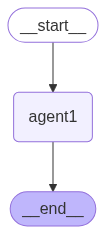

In [34]:
app

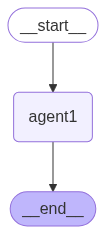

In [35]:
# Alternatively, you can display the graph as implemented below
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

**NOTE!** Remember to store your compiled graph in a variable (`app` here).

In [36]:
answers = app.invoke({"data": [1,2,3,4], "name": "Jimmy"})

State before action: {'data': [1, 2, 3, 4], 'name': 'Jimmy'}
State after action: {'data': [1, 2, 3, 4], 'name': 'Jimmy', 'result': 'Hey Jimmy! This is the result: 10'}


In [37]:
print(answers)

{'data': [1, 2, 3, 4], 'name': 'Jimmy', 'result': 'Hey Jimmy! This is the result: 10'}


In [38]:
print(answers["result"])

Hey Jimmy! This is the result: 10
